In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import HUXt as H
import astropy.units as u
from skimage import measure
%matplotlib inline

In [9]:
# Set up HUXt1D to run a 5 day simulation of Carrington rotation 2000, and output model data every 4 timesteps (about 35min)
cr_num = 2000
lon = 0.0
model = H.HUXt1D(cr_num=cr_num, lon=lon, simtime=5, dt_scale=4)

# Get a list of CMEs with different launch longitudes and times
cme_list=[]
n_cme = 3
launch_lons = [0, 5, 10]
daysec = 86400
launch_times = [(0.25 + i*4/n_cme)*daysec for i in range(n_cme)]
               
for lon, t_launch in zip(launch_lons, launch_times):
    cme = H.ConeCME(t_launch=t_launch, longitude=lon, width=30, v=1000, thickness=5)
    cme_list.append(cme)
    
# Run HUXt1D for these cmes, save to file 
tag = 'test'
#model.solve(cme_list, save=True, tag=tag)
model.solve([], save=True, tag=tag)

In [3]:
model2, cme_list2 = H.load_HUXt1D_run("C:\\Users\\yq904481\\research\\repos\\HUXt\\data\\HUXt1D\\HUXt1D_CR2000_test.hdf5")
print(cme_list2)
print(model2.cmes)

[]
[]


In [4]:
model = H.HUXt2D(cr_num=cr_num, simtime=5, dt_scale=4)
model.solve([], save=True, tag=tag)

In [5]:
model2, cme_list2 = H.load_HUXt2D_run("C:\\Users\\yq904481\\research\\repos\\HUXt\\data\\HUXt2D\\HUXt2D_CR2000_test.hdf5")

In [6]:
print(model2.cmes)
print(cme_list2)

[]
[]


In [7]:
model.animate('cme','test1')
model2.animate('cme', 'test2')

t:   0%|                                                                             | 0/240 [00:00<?, ?it/s, now=None]

Moviepy - Building video C:\Users\yq904481\research\repos\HUXt\figures\HUXt2D\HUXt2D_CR2000_test1_movie.mp4.
Moviepy - Writing video C:\Users\yq904481\research\repos\HUXt\figures\HUXt2D\HUXt2D_CR2000_test1_movie.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\yq904481\research\repos\HUXt\figures\HUXt2D\HUXt2D_CR2000_test1_movie.mp4


t:   0%|                                                                             | 0/240 [00:00<?, ?it/s, now=None]

Moviepy - Building video C:\Users\yq904481\research\repos\HUXt\figures\HUXt2D\HUXt2D_CR2000_test2_movie.mp4.
Moviepy - Writing video C:\Users\yq904481\research\repos\HUXt\figures\HUXt2D\HUXt2D_CR2000_test2_movie.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\yq904481\research\repos\HUXt\figures\HUXt2D\HUXt2D_CR2000_test2_movie.mp4


(<Figure size 1008x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22829aa2588>)

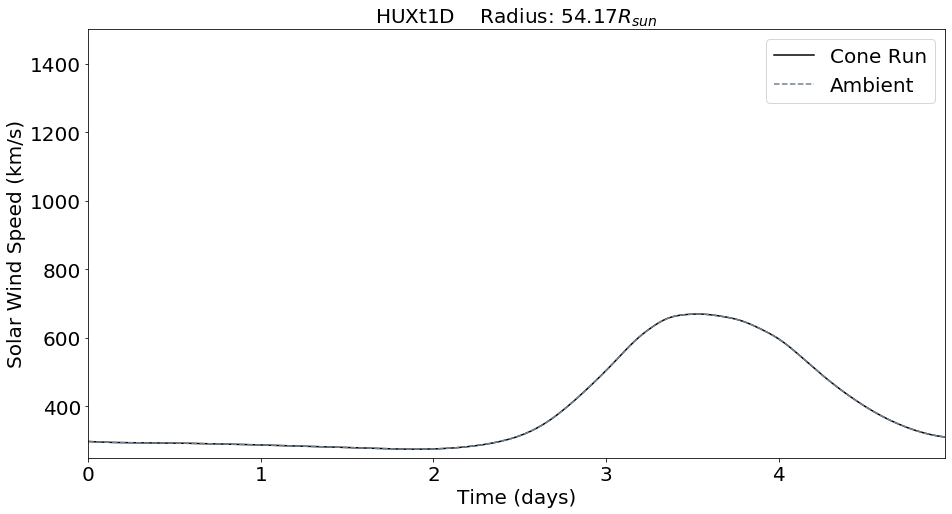

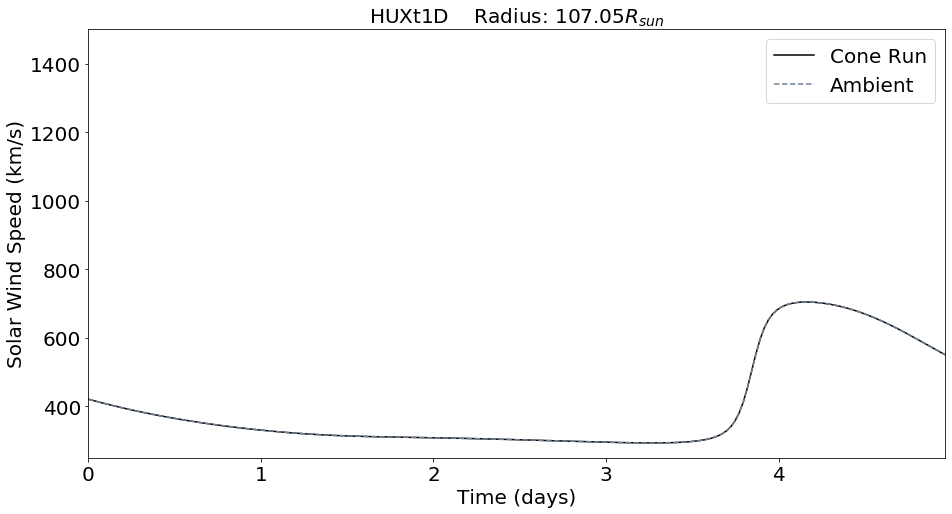

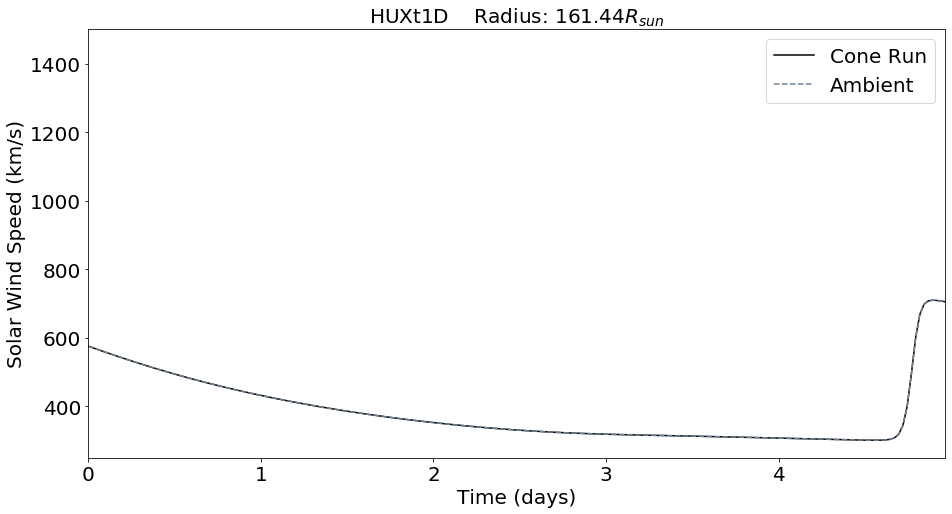

In [10]:
r = (0.25*u.AU).to(u.solRad)
model.plot_timeseries(r, 'both')

r = (0.5*u.AU).to(u.solRad)
model.plot_timeseries(r, 'both')

r = (0.75*u.AU).to(u.solRad)
model.plot_timeseries(r, 'both')